<a href="https://colab.research.google.com/github/josevanito/data-sciencie/blob/main/chumprojet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Projeto Churn Prediction**



A abordagem deste projeto, será a construção de um modelo de Machine Learning para prever churn em uma empresa de telecomunicações, ou seja, um modelo preditivo que identifica um cliente que está prestes a cancelar o serviço, de maneira que uma ação de retenção possa ser realizada com antecedência.


<center><img alt="Churn" width="100%" src=https://miro.medium.com/max/1400/1*AhveViSfye8s9xDhHCZXBA.png></center>
Fundamental na administração, a análise do churn pode sinalizar que existe algo de errado com o serviço oferecido. Além disso, os dados envolvidos podem ser utilizados para tentar encontrar padrões nos cancelamentos. 
A abordagem deste projeto, será a construção de um modelo de *Machine Learning* para prever churn em uma **empresa de telecomunicações**, ou seja, um modelo preditivo que identifica um cliente que está prestes a cancelar o serviço, de maneira que uma ação de retenção possa ser realizada com antecedência.


# **Obtenção dos Dados**

Os dados utilizados foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e podem ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

# ** Bibliotecas Utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer, MaxAbsScaler, Normalizer, QuantileTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
pd.set_option('display.max_columns', 40)

# **Dicionário de Variáveis**



## **Dicionário de Variáveis**

|Atributo|Descrição|
|:-------|:---------|
| customerID | Identificação do Cliente|
| gender | Genero/Sexo do Cliente|
| SeniorCitizen | Cliente Idoso|
| Partner | Cliente possui parceiro|
| Dependents | Cliente possui dependentes|
| tenure | Período que o cliente está com o serviço ativo|
| PhoneService | Cliente possui serviço de telefone|
| MultipleLines | Cliente possui várias linhas de telefone|
| InternetService | Cliente possui serviço de internet/Categoria de serviço de internet|
| OnlineSecurity | Cliente possui serviço de segurança online|
| OnlineBackup | Cliente possui serviço de *beckup online*|
| DeviceProtection | Cliente possui serviço de proteção de dispositivo|
| TechSupport | Cliente possui serviço de suporte técnico|
| StreamingTV | Cliente possui serviço de Transmissão de TV|
| StreamingMovies | Cliente possui serviço de *streaming* de filmes|
| Contract | Período de duração do contrato|
| PaperlessBilling | Faturamento sem papel (correspondência em papel)|
| PaymentMethod | Forma de pagamento|
| MonthlyCharges | Valor da mensalidade|
| TotalCharges | Custos totais ao longo do tempo de posse do serviço|
| Churn | Cliente cancelou o serviço|


 **Análise Exploratória**
 ---





#** Conjuntos de Dados

In [3]:
df_churn = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
print("Linhas:\t\t{}".format(df_churn.shape[0]))
print("Colunas:\t{}".format(df_churn.shape[1]))

Linhas:		7043
Colunas:	21


A visualização das 5 primeiras entradas já permite entender como o dataset está composto. Mesmo que não haja uma definição sobre o significado dos nomes das features, é possível inferir, uma vez que a natureza das empresas de telecomunicações são parecidas.
Vimos que o dataset é composto de 7043 entradas e 21 variáveis.

Vamos dar uma olhada nos dados ausentes,os nomes da colunas e os tipos de variáveis por colunas

In [10]:
print("Dados ausentes (total):\t{}\n".format(df_churn.isnull().sum().values.sum()))
print(df_churn.isnull().sum() / df_churn.shape[0])
print("\nNomes das features:\n{}\n".format(df_churn.columns.values))
print("Valores únicos (por coluna):\n{}\n".format(df_churn.nunique()))
print("Tipos de Variáveis (por coluna)\n{}".format(df_churn.dtypes))

Dados ausentes (total):	0

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

Nomes das features:
['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']

Valores únicos (por coluna):
customerID          7043
gender                 2
SeniorCitizen          2
Partner             

### **Observações**

 - Esta análise inicial indica a qualidade do *dataset*. Apesar de não apresentar dados faltantes o conjunto de dados contém muitas variáveis categóricas que deverão ser convertidas para valores numéricos na etapa de pre-processamento.

 - `customerID` - Não contribui com informação relevante para a predição.
 

In [12]:
# Deletando a variável customerID
df_churn.drop('customerID', axis=1, inplace=True)

 Ao tentar transformar o atributo `TotalCharges` em numérico foi verificado um erro que indicava a existência de valores vazios nesta variável.
Foram encontrados 11 valores vazios nesta variável.
Analisando estes valores é possível notar que a variável `tenure`, que representa o período em que o cliente está com o serviço ativo, apresenta valores 0. Isso pode indicar que são clientes recém-cadastrados, ou seja, acabaram de contratar os serviços.


In [14]:
# Analisando os dados vazios do atributo TotalCharges
dados_vazios = df_churn.loc[df_churn['TotalCharges'] == ' ']
print(f'Quantidade de dados vazios: {dados_vazios.shape[0]}')
dados_vazios

Quantidade de dados vazios: 11


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
# Novo dataset sem as entradas vazias
df_churn2 = df_churn.loc[df_churn['TotalCharges'] != ' '].copy()
# Transformando a variável TotalCharges em numérica
df_churn2['TotalCharges'] = df_churn2['TotalCharges'].astype(float)

*## **Outliers**
--

In [16]:
df_churn2[['tenure',	'MonthlyCharges',	'TotalCharges']].describe().round(2)

,tenure,MonthlyCharges,TotalCharges
count,7032.00,7032.00,7032.00
mean,32.42,64.80,2283.30
std,24.55,30.09,2266.77
min,1.00,18.25,18.80
25%,9.00,35.59,401.45
50%,29.00,70.35,1397.48
75%,55.00,89.86,3794.74
max,72.00,118.75,8684.80


Vimos pelo método Describe,que não há indicios de presença de*** outliers***

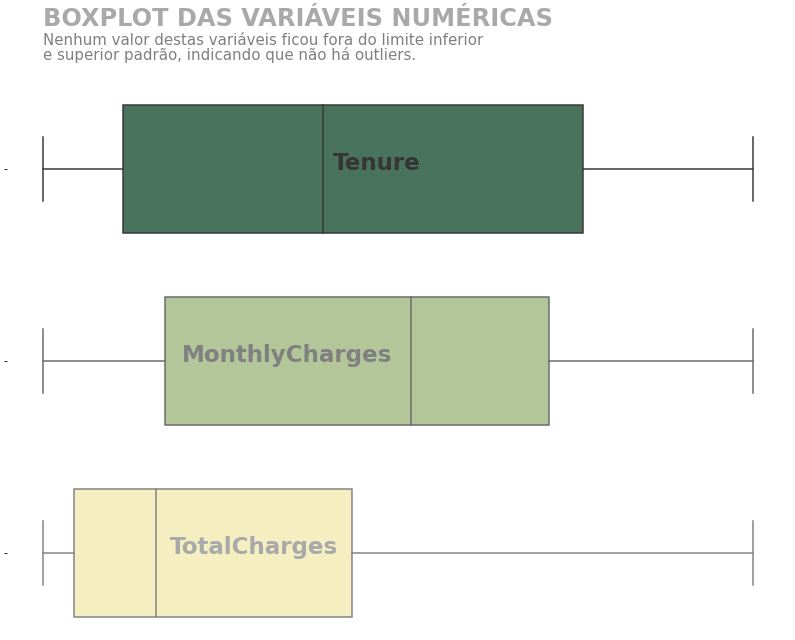

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(14, 10))
sns.boxplot(df_churn2['tenure'], color='#427a5b', ax=ax1)
sns.boxplot(df_churn2['MonthlyCharges'], color='#b4cd93', ax=ax2)
sns.boxplot(df_churn2['TotalCharges'], color='#fcf5b8', ax=ax3)

ax1.text(x=1 ,y=-0.9 , s='BOXPLOT DAS VARIÁVEIS NUMÉRICAS', fontsize=24, color='darkgray', weight='bold')
ax1.text(x=1 ,y=-0.78 , s='Nenhum valor destas variáveis ficou fora do limite inferior ', fontsize=15, color='gray')
ax1.text(x=1 ,y=-0.69 , s='e superior padrão, indicando que não há outliers.', fontsize=15, color='gray')

ax1.text(x=30 ,y=0 , s='Tenure', fontsize=23, color='#363636', weight='bold')
ax2.text(x=38 ,y=0 , s='MonthlyCharges', fontsize=23, color='gray', weight='bold')
ax3.text(x=1570 ,y=0 , s='TotalCharges', fontsize=23, color='darkgray', weight='bold')

for ax in [ax1, ax2, ax3]:  
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.set_xticklabels([])
  ax.set_xticks([])
  ax.set_xlabel(None)

Analisando o boxplot para as colunas MonthlyCharges e TotalCharges, perceba como a distribuição dos valores reforça essa hipótese. O threshold padrão não acusou nenhum plot fora dos limites superior e inferior.
A variável tenure está relacionada ao tempo que um cliente permance assinando determinado serviço. Em outras palavras, pode-se dizer que é um indicativo de fidelidade.

## **Distribuição das Classes**

A distribuição de registro entre as classes está desbalanceada. Esta característica do dataset pode afetar o desempenho dos algoritmos de Machine Learning, sendo necessário aplicar uma técnica de balanceamento no conjunto de dados.

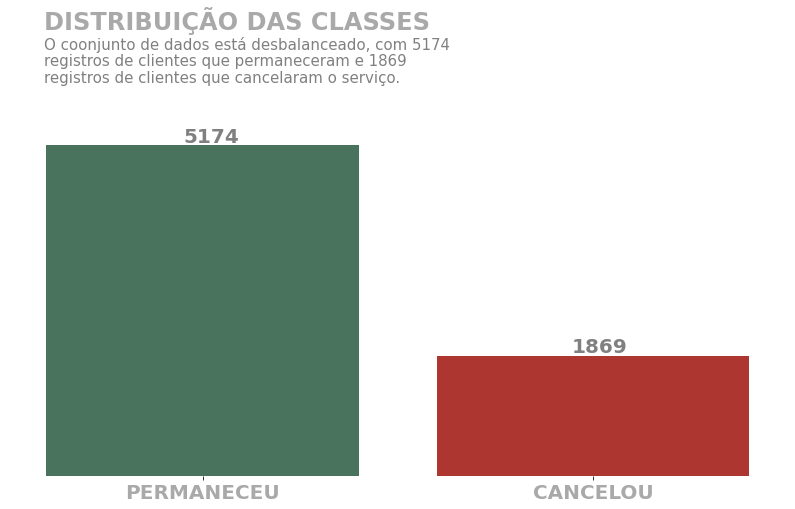

In [18]:
# Plotar distribuição de classes
cor1 = {classe: "#427a5b" if classe == 'No' else "#c2251b" for classe in df_churn['Churn'].unique()}
fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(df_churn['Churn'], palette=cor1, ax=ax)

permaneceu  = (df_churn['Churn']=='No').sum()
cancelou    = (df_churn['Churn']=='Yes').sum()

fig.text(x= 0.162 , y= 0.9 , s='DISTRIBUIÇÃO DAS CLASSES',
        fontsize=24, color='darkgray', weight='bold')
fig.text(x= 0.162 , y= 0.865 , s=f'O coonjunto de dados está desbalanceado, com {permaneceu}',
        fontsize=15, color='gray')
fig.text(x= 0.162 , y= 0.837 , s=f'registros de clientes que permaneceram e {cancelou}',
        fontsize=15, color='gray')
fig.text(x= 0.162 , y= 0.809 , s=f'registros de clientes que cancelaram o serviço.',
        fontsize=15, color='gray')

fig.text(x= 0.3 , y= 0.705 , s=permaneceu,
        fontsize=20, color='gray', weight='bold')
fig.text(x= 0.685 , y= 0.34 , s=cancelou,
        fontsize=20, color='gray', weight='bold')


ax.set_ylim(0, 6800)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels(['PERMANECEU', 'CANCELOU'], fontsize=20, color='darkgray', weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

## **Resumo da Análise Exploratória**

- Ao tentar transformar o atributo `TotalCharges` em numérico foi constatado a presença de valores vazios neste atributo. Foi excluído estes valores e a variável convertida para que se pudesse continuar a análise.

- O Conjunto de Dados não possui *outliers*.

- A distribuição entre as classes está desbalanceada, com 5174 registros de clientes que permaneceram e 1869 registros de clientes que cancelaram.

- A variável `TotalCharges` é redundante, visto que o seu valor é basicamente a multiplicação de `tenure` e `MonthlyCharges`.

- Foram encontradas categorias redundantes no conjunto de dados. Essas categorias eram referentes aos atributos `PhoneService` e `InternetService`.

- As variáveis `tenure` e `MonthlyCharges` devem passar por um processo de *feature scaling* para que fique com uma escala compatível com o restante das variáveis do conjunto de dados.

#***Machine Learning***

---

<center><img alt="Machine Learning" width="100%" src="https://img.freepik.com/fotos-gratis/antecedentes-de-energia-nuclear-de-ia-inovacao-futura-de-tecnologia-disruptiva_53876-129783.jpg?t=st=1648905138~exp=1648905738~hmac=9567523a179ec62da56fc4d78f8eeb06958142a22918337c428525707f36c0b9&w=900"></center>

## **Tratamento das Variáveis Categóricas**

Após encontrar as variáveis categóricas, as mesmas foram divididas em dois grupos. Um grupo contém as variáveis com duas categorias e o outro com três ou mais. As variáveis que apresentavam duas categorias tiveram esses valores substituídos por 0 ou 1. Já as variáveis com três ou mais categorias foram submetidas ao processo de *Dummies values*, onde detalhes da aplicação podem ser entendidos [neste artigo](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd), mas basicamente cada categoria ganha uma coluna (torna-se um atributo), com valores 0 indicando ausência, e 1 presença.

In [23]:
# Definindo as variáveis preditoras e variável target
x = df_churn2.drop('Churn', axis=1)
y = df_churn2['Churn'].map({'No':0, 'Yes':1}).astype(int)

In [25]:
# Tratando as variáveis categóricas
colunas_dm = []
colunas = x.columns.tolist()

for c in colunas:
  if ((x[c].dtypes) == 'object') & ((x[c].nunique()) ==2):
    colunas_le = x[c].unique().tolist()
    x[c] = x[c].map({colunas_le[0]: 0, colunas_le[1]: 1}).astype(int)
  elif ((x[c].dtypes) == 'object') & ((x[c].nunique()) !=2):
    colunas_dm.append(c)

encolding = pd.get_dummies(x[colunas_dm])

# Concatenando os dataset x e encolding
x_concat = pd.concat([x, encolding], axis=1)

# Excluindo as variáveis originais
x_concat.drop(colunas_dm, axis=1, inplace=True)
df_churn2.drop('TotalCharges', axis=1, inplace=True)

In [26]:
x_concat.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,0,1,0,0,29.85,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,1,0,34,1,1,56.95,1889.50,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,1,0,2,1,0,53.85,108.15,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,1,0,45,0,1,42.30,1840.75,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,1,0,2,1,0,70.70,151.65,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


## **Divisão em Treino e Teste**

Os dados foram divididos na proporção de 70% para treino e 30% para teste.


In [27]:
# Dividindo os dados em Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x_concat, y, test_size=0.3, random_state=0)

Neste projeto utilizo juntamente o Pipeline, disponível na biblioteca imblearn, com o ColumnTransformer, que torna possível aplicar pré-processamentos específicos para cada coluna, disponível na biblioteca sklearn.
É importante destacar que ao aplicar tanto o Pipeline quanto o ColumnTransformer a saída será um array. Desta forma é importante aplicar primeiramente o ColumnTransformer, pois o mesmo necessita saber em quais colunas aplicar as transformações. Caso aplique o Pipeline primeiro, a saída sendo um array não possui o cabeçalho, impossibilitando a utilização do ColumnTransformer.

### **Balanceamento e Dimensionamento dos Dados**

Buscando o melhor resultado, será feito uma combinação de técnicas tanto de balanceamento como de Dimensionamento dos dados.

Para o balanceamento, será aplicado aos dados ambas as técnicas de reamostragem, ***RandomUnderSampler*** (exclui aleatoriamente exemplos na classe majoritária) e ***RandomOverSampler***(cria exemplos duplicados aleatoriamente na classe minoritária).

Para o dimensionamento, as técnicas que serão combinadas são:
- StandardScaler
- MinMaxScaler
- RobustScaler
- PowerTransformer
- MaxAbsScaler
- Normalizer
- QuantileTransformer

Essas técnicas serão aplicadas nos atributos `tenure` e `MonthlyCharges`.

Os métodos de dimensionamento servem, de certa forma, como um hiperparâmetro para o modelo de *machine learning*, pois alterar o método pode afetar drasticamente os resultados do modelo. Este tema é apresentado de maneira aprofundada [neste artigo](https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf).

In [28]:
# Técnicas de balanceamento
balance_list = [RandomUnderSampler(), RandomOverSampler()]

# Técnicas de dimensionamento
dimens_list = [StandardScaler(), MinMaxScaler(), RobustScaler(), PowerTransformer(),
               MaxAbsScaler(), Normalizer(), QuantileTransformer()]
               
# Colunas que devem ser dimensionadas
coluna = ['tenure', 'MonthlyCharges']


As técnicas apresentadas acima serão combinados com diferentes algoritmos de *machine learning*. São eles:

- RandomForestClassifier
- LogisticRegression
- GradientBoostingClassifier
- SVC
- XGBClassifier

As duas melhores combinações de **Modelo**, **Balanceamento** e **Dimensionamento** serão escolhidas para o processo de ajustes de hiperparâmetros. Destas duas, a melhor será escolhida como **Modelo Final**

In [29]:
model_list = [RandomForestClassifier(), LogisticRegression(solver='liblinear'),
              GradientBoostingClassifier(), SVC(), XGBClassifier()]
skfold = StratifiedKFold(n_splits=5)

## **Avaliação dos Algoritmos de *Machine Learning***

Os modelos serão avaliados pela métrica ***Recall***, que irá mostrar a razão entre a quantidade de clientes que o modelo previu o cancelamento, e a quantidade de clientes que realmente cancelaram o serviço. Ou seja, mostra a proporção de positivos encontrados corretamente. O *recall* é calculado da seguinte forma:

$$
Recall = \frac{TP}{TP+FN}
$$

In [30]:
# Avaliando as combinações de modelo e pré-processamento
model = []
balanceamento = []
dimensionamento = []
recall = []
i = 0

for modelo in model_list:
  for balance in balance_list:
    for dimensi in dimens_list:
      preprocessor = ColumnTransformer([('preproc', dimensi, coluna)], remainder='passthrough')
      pipe = Pipeline([('preproc', preprocessor), ('balance', balance), ('modelo', modelo)])
      resultado = cross_val_score(pipe, x_train, y_train, cv=skfold, scoring='recall')
      model.append(modelo.__class__.__name__)
      balanceamento.append(balance.__class__.__name__)
      dimensionamento.append(dimensi.__class__.__name__)
      recall.append(resultado.mean().round(4))
      i +=1

dic = {'Modelo':model, 'Balanceamento':balanceamento, 'Dimensionamento':dimensionamento, 'Recall':recall}
df_result = pd.DataFrame(data=dic)
df_result.head(i)

,Modelo,Balanceamento,Dimensionamento,Recall
0,RandomForestClassifier,RandomUnderSampler,StandardScaler,0.7481
1,RandomForestClassifier,RandomUnderSampler,MinMaxScaler,0.7580
2,RandomForestClassifier,RandomUnderSampler,RobustScaler,0.7451
3,RandomForestClassifier,RandomUnderSampler,PowerTransformer,0.7458
4,RandomForestClassifier,RandomUnderSampler,MaxAbsScaler,0.7466
...,...,...,...,...
65,XGBClassifier,RandomOverSampler,RobustScaler,0.7763
66,XGBClassifier,RandomOverSampler,PowerTransformer,0.7755
67,XGBClassifier,RandomOverSampler,MaxAbsScaler,0.7770
68,XGBClassifier,RandomOverSampler,Normalizer,0.7732


In [31]:
# Melhores Modelos
best_models = df_result.groupby(['Modelo']).Recall.max().sort_values(ascending=False)[:2].tolist()
for i in range(len(best_models)):
  print(f'{df_result.loc[df_result["Recall"] == best_models[i]]}\n') 

           Modelo       Balanceamento      Dimensionamento  Recall
62  XGBClassifier  RandomUnderSampler  QuantileTransformer  0.8044

                Modelo      Balanceamento Dimensionamento  Recall
26  LogisticRegression  RandomOverSampler      Normalizer  0.8029



As duas melhores combinações foram:
- 1° Dados balanceados com **RandomUnderSampler**, dimensionados com **Normalizer** e aplicando o algoritmo de **LogisticRegression**.

- 2° Dados balanceados com **RandomUnderSampler**, dimensionados com **Normalizer** e aplicando o algoritmo de **XGBClassifier**.

### **Otimizando **

Encontrada as melhores combinações de modelo e pré-processamento, o próximo passo será submeter os modelos ao processo de otimização dos hiperparâmetros, também chamado *tuning* de modelos de *Machine Learning*.
A abordagem de *tuning* utilizada neste projeto é a busca exaustiva, chamada Grid Search. Essa técnica consiste em testar diferentes combinações de hiperparametros exaustivamente e separar a melhor. Devido ao fato de que a inserção de um parâmetro na otimização causar um aumento exponencial de combinações, muitas vezes não torna possível combinar todos os parâmetros existentes de um algoritmo. Assim, torna indispensável conhecer o funcionamento dos algoritmos usados para encontrar quais hiperparâmetros possuem maior influência no resultado.

O algoritmo *XGBClassifier* possui um hiperparâmetro chamado ***booster***. Esse hiperparâmetro define o algoritmo que será usado para fazer o *ensemble*, que por padrão é o *Decision tree*, porém, pode ser trocado por um algoritmo de regressão linear.

Analisando o resultado da etapa anterior nota-se que o melhor resultado foi obtido pelo modelo de *LogisticRegression*, indicando que uma regressão se ajusta bem a esses dados.

Portanto, um hiperparâmetro crucial, levando-se em consideração este conjunto de dados, é o *booster*, que a princípio terá um desempenho melhor com um modelo de regressão do que com um modelo de árvore de decisão.

In [32]:
best_model_list = [LogisticRegression(solver='liblinear'), XGBClassifier()]
for modelo in best_model_list:
  if modelo.__class__.__name__ == 'LogisticRegression':
    parametros = {'modelo__penalty':['l1', 'l2'],
                  'modelo__C':[0.004, 0.005, 0.006, 0.007]}
    
  else:
    parametros = {'modelo__n_estimators':[50, 100],
                  'modelo__gamma':[0.001, 0.05, 0.1, 0.3],
                  'modelo__learning_rate':[0.001, 0.005, 0.01, 0.1],
                  'modelo__booster':['gbtree', 'gblinear']}

  preprocessor = ColumnTransformer([('norm', Normalizer(), coluna)], remainder='passthrough')
  pipe = Pipeline([('preproc', preprocessor), ('balance', RandomUnderSampler()), ('modelo', modelo)])
  resultado = GridSearchCV(pipe, parametros, cv=skfold, scoring='recall')
  resultado.fit(x_train, y_train)
  
  print(f'Modelo:---------- {modelo.__class__.__name__} ----------')
  print(f'Recall:           {resultado.best_score_:.4f}')
  print(f'Hiperparâmetros:  {resultado.best_params_}\n')

Modelo:---------- LogisticRegression ----------
Recall:           0.7854
Hiperparâmetros:  {'modelo__C': 0.006, 'modelo__penalty': 'l2'}

Modelo:---------- XGBClassifier ----------
Recall:           0.8136
Hiperparâmetros:  {'modelo__booster': 'gbtree', 'modelo__gamma': 0.001, 'modelo__learning_rate': 0.001, 'modelo__n_estimators': 50}



**Como esperado, o XGBClassifier obteve um Recall de 95,3% utilizando um booster gblinear, saindo-se melhor que a LogisticRegression com 88,6%.**

## **Avaliação do Algoritmo XGBClassifier**

Após passar pelo processo de validação cruzada para encontrar o melhor algoritmo, pré-processamento e hiperparâmetros, a combinação ficou da seguinte forma:

- Algoritmo: ***XGBClassifier***
  - ***booster: gblinear***
  - ***gamma: 0.001***
  - ***learning_rate: 0.001***
  - ***n_estimators: 50***
- Balanceamento: ***RandomUnderSampler***
- Dimensionamento: ***Normalizer***

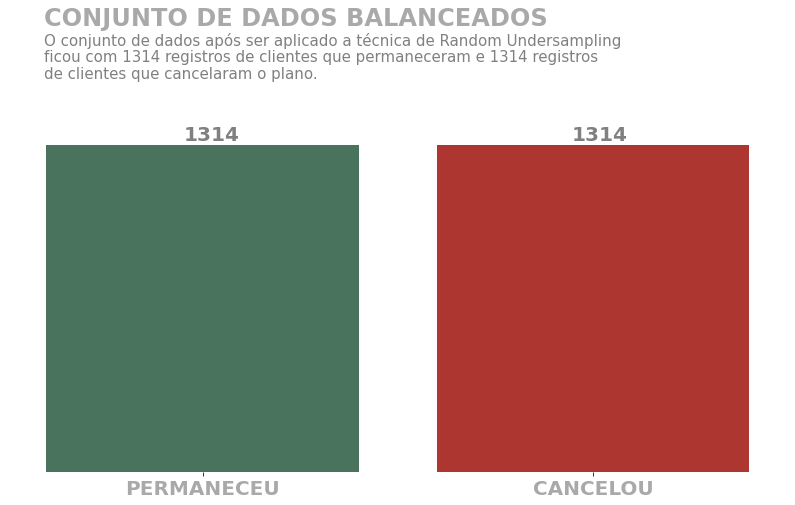

In [33]:
# balanceando os dados de Treino
rus = RandomUnderSampler()
x_train, y_train = rus.fit_resample(x_train, y_train)

# Plotar a nova distribuição de classes
cor2 = {classe: "#427a5b" if classe == 0 else "#c2251b" for classe in y_train.unique()}
fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(y_train, palette=cor2, ax=ax)

permaneceu = (y_train==0).sum()
cancelou    = (y_train==1).sum()

fig.text(x= 0.162 , y= 0.9 , s='CONJUNTO DE DADOS BALANCEADOS',
        fontsize=24, color='darkgray', weight='bold')
fig.text(x= 0.162 , y= 0.865 , s='O conjunto de dados após ser aplicado a técnica de Random Undersampling',
        fontsize=15, color='gray')
fig.text(x= 0.162 , y= 0.837 , s=f'ficou com {permaneceu} registros de clientes que permaneceram e {cancelou} registros',
        fontsize=15, color='gray')
fig.text(x= 0.162 , y= 0.809 , s=f'de clientes que cancelaram o plano.',
        fontsize=15, color='gray')

fig.text(x= 0.3 , y= 0.7 , s=permaneceu,
        fontsize=20, color='gray', weight='bold')
fig.text(x= 0.685 , y= 0.7 , s=cancelou,
        fontsize=20, color='gray', weight='bold')


ax.set_ylim(0, 1750)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xticklabels(['PERMANECEU', 'CANCELOU'], fontsize=20, color='darkgray', weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()

### **Resultado**

Após treinar o algoritmo ***XGBClassifier*** utilizando o *dataset* completo de treino, foi obtido um ***Recall*** de 94,4% ao expor o modelo aos dados de teste.

Isso significa que o modelo conseguiu prever 94,4% de todos os registros de cancelamento do conjunto de teste com base nas variáveis preditoras.

O valor encontrado ficou muito próximo dos 95,1% obtido anteriormente, indicando que o modelo ficou generalista, ou seja, o modelo não ficou sobreajustado aos dados de treino, efeito conhecido como ***overfitting***.

Em contrapartida, de todos os registros rotulados como permaneceu o modelo indicou erroneamente que 54,1% destes iriam cancelar.

In [35]:
# Criando um normalizador usando o conjunto de treino
normalizador = Normalizer().fit(x_train[['tenure', 'MonthlyCharges']])

# Normalizando os dados de treino
x_train[['tenure', 'MonthlyCharges']] = normalizador.transform(x_train[['tenure', 'MonthlyCharges']])

# Normalizando os dados de teste
x_test[['tenure', 'MonthlyCharges']] = normalizador.transform(x_test[['tenure', 'MonthlyCharges']])

--------------------------------------------------
                   XGBClassifier
--------------------------------------------------
              precision    recall  f1-score   support

           0     0.8990    0.7215    0.8006      1555
           1     0.4977    0.7730    0.6055       555

    accuracy                         0.7351      2110
   macro avg     0.6984    0.7473    0.7030      2110
weighted avg     0.7935    0.7351    0.7493      2110

AUC: 0.7473


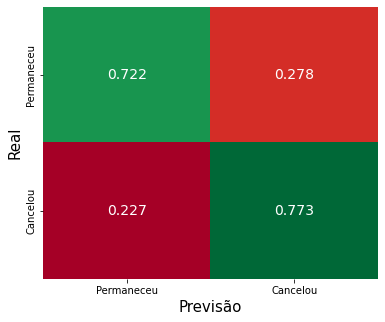

In [36]:
# Definindo o Modelo
modelo = XGBClassifier(n_estimators=50,
                       learning_rate=0.001,
                       gamma=0.001,
                       booster='gblinear',
                       random_state=0)

# Treinando o Modelo
modelo.fit(x_train, y_train)

# Previsão usando os dados de teste
y_pred = modelo.predict(x_test)
y_prob = modelo.predict_proba(x_test)[:,1]

# Exibindo o Resultado
print('-'*50)
print('                   XGBClassifier')
print('-'*50)
print(classification_report(y_test, y_pred, digits=4))
print(f'AUC: {roc_auc_score(y_test, y_pred):.4f}')

# Exibindo a confusion matrix 
fig, ax = plt.subplots(figsize=(6, 5))

# Confusion Matrix 
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'),
            cmap='RdYlGn', annot=True, fmt='.3f', cbar=False,
            annot_kws={'size': 14}, xticklabels=['Permaneceu','Cancelou'],
            yticklabels=['Permaneceu','Cancelou'], ax=ax)
ax.set_ylabel('Real', fontsize=15)
ax.set_xlabel('Previsão', fontsize=15)

plt.show()

# **Conclusão**

A construção de um modelo preditivo confiável depende de diversos fatores, desde uma coleta adequada dos dados até a escolha correta do algoritmo que se adéqua melhor a esses dados. 

No decorrer do projeto foi apresentado a importância da utilização de *Pipeline*, em conjunto com o *ColumnTransformer*, para facilitar a aplicação de técnicas de pré-processamento, além de evitar o vazamento de dados durante o processo.

Conhecer bem os algoritmos que estão sendo utilizados pode ajudar a encontrar ajustes em hiperparâmetros mais específicos para determinado conjunto de dados. Foi o caso do hiperparâmetro *booster* do *XGBClassifier* que define o algoritmo *ensamble* que será aplicado aos dados, e ao utilizar *gblinear* indica que regressões lineares se adaptam melhor a esses dados do que as árvores de decisão (gbtree) que é o padrão para o *XGBClassifier*.

O modelo, após de treinado, obteve um *recall* de 94,4% quando exposto a novos dados. Isso significa que o modelo consegue identificar 94,4% de todos os possíveis cancelamentos. Resultado obtido utilizando o algoritmo *XGBClassifier* aplicando aos dados a técnica de balanceamento *RandomUnderSampler* e a técnica de dimensionamento *Normalizer*.